In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("hospital_data_sampleee.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             29998 non-null  object
 1   Check-in Time    29998 non-null  object
 2   Entry Time       29998 non-null  object
 3   Completion Time  29998 non-null  object
 4   HospitalID       29998 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [2]:
df["Check-in Time"] = pd.to_datetime(df["Check-in Time"]) - pd.Timestamp('today').normalize()
df["Entry Time"] = pd.to_datetime(df["Entry Time"]) - pd.Timestamp('today').normalize()
df["Completion Time"] = pd.to_datetime(df["Completion Time"]) - pd.Timestamp('today').normalize()
df.describe()

C:\Users\David\AppData\Local\Temp\ipykernel_21680\1835036129.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Check-in Time"] = pd.to_datetime(df["Check-in Time"]) - pd.Timestamp('today').normalize()
C:\Users\David\AppData\Local\Temp\ipykernel_21680\1835036129.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Entry Time"] = pd.to_datetime(df["Entry Time"]) - pd.Timestamp('today').normalize()
C:\Users\David\AppData\Local\Temp\ipykernel_21680\1835036129.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Completion Time"] = pd.to_datetime(df["Completion Time"

,Check-in Time,Entry Time,Completion Time
count,29998,29998,29998
mean,0 days 13:28:58.862357490,0 days 14:07:53.724248283,0 days 14:12:48.321554770
std,0 days 04:02:53.637337419,0 days 03:58:45.685113421,0 days 03:58:22.883373346
min,0 days 07:53:25,0 days 08:07:41,0 days 08:07:57
25%,0 days 09:54:58.500000,0 days 10:43:55.250000,0 days 10:49:05.500000
50%,0 days 12:05:38.500000,0 days 12:47:44.500000,0 days 12:53:05
75%,0 days 16:36:46,0 days 17:11:38.500000,0 days 17:16:16.500000
max,0 days 23:47:37,0 days 23:54:47,0 days 23:55:57


In [3]:
df['Waiting Time'] = (df['Entry Time'] - df['Check-in Time'])  / pd.Timedelta('1 minute')
df['Check-in Time'] = df['Check-in Time'] / pd.Timedelta('1 hour')
df['Entry Time'] = df['Entry Time'] / pd.Timedelta('1 hour')
df['Completion Time'] = df['Completion Time'] / pd.Timedelta('1 hour')
df.describe()

,Check-in Time,Entry Time,Completion Time,Waiting Time
count,29998.000000,29998.000000,29998.000000,29998.000000
mean,13.483017,14.131590,14.213423,38.914365
std,4.048233,3.979357,3.973023,43.382190
min,7.890278,8.128056,8.132500,0.566667
25%,9.916250,10.732014,10.818194,13.987500
50%,12.094028,12.795694,12.884722,26.325000
75%,16.612778,17.194028,17.271250,48.833333
max,23.793611,23.913056,23.932500,733.333333


In [4]:
df

,Date,Check-in Time,Entry Time,Completion Time,HospitalID,Waiting Time
0,11/1/2019,8.595833,9.298333,9.496111,HOSP4,42.150000
1,11/1/2019,19.321111,21.043333,21.401944,HOSP6,103.333333
2,11/1/2019,10.781111,11.940278,12.107778,HOSP2,69.550000
3,11/1/2019,9.642778,10.930556,10.967222,HOSP6,77.266667
4,11/1/2019,11.272500,12.113611,12.115000,HOSP1,50.466667
...,...,...,...,...,...,...
29993,11/1/2019,14.023333,14.148889,14.261667,HOSP13,7.533333
29994,11/1/2019,14.025833,14.354722,14.364722,HOSP13,19.733333
29995,11/1/2019,14.028056,14.232500,14.274722,HOSP13,12.266667
29996,11/1/2019,14.028333,14.222500,14.222778,HOSP13,11.650000


<Axes: xlabel='Entry Time', ylabel='Completion Time'>

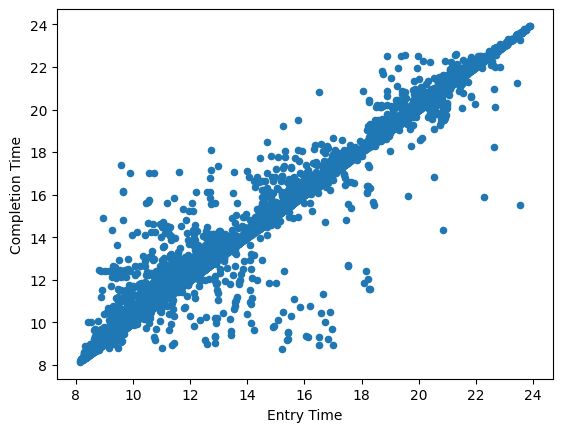

In [5]:
df.plot.scatter(x='Entry Time', y='Completion Time')

<Axes: xlabel='Entry Time', ylabel='Completion Time'>

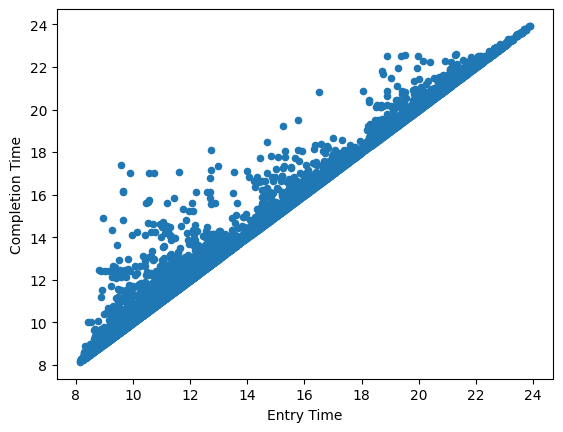

In [6]:
# Remove wrong data
df = df.loc[df['Entry Time'] <= df['Completion Time']]
df.plot.scatter(x='Entry Time', y='Completion Time')

<Axes: xlabel='Check-in Time', ylabel='Waiting Time'>

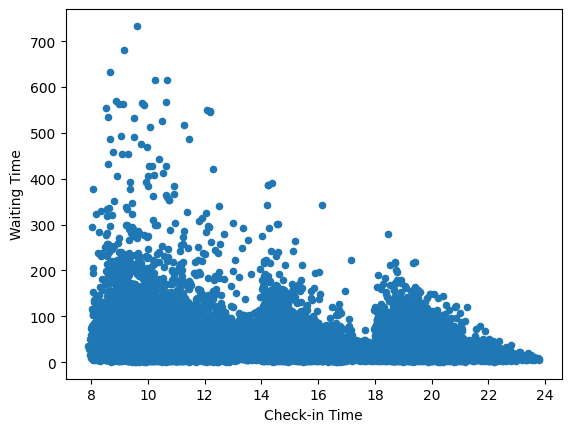

In [7]:
df.plot.scatter(x='Check-in Time', y='Waiting Time')

In [8]:
df = df.loc[df['HospitalID'] == 'HOSP1']
df = df.drop(columns=['Date', 'HospitalID'])
df

,Check-in Time,Entry Time,Completion Time,Waiting Time
4,11.272500,12.113611,12.115000,50.466667
17,11.105000,11.772500,11.884444,40.050000
34,10.222500,11.112778,11.157778,53.416667
38,16.277222,16.933889,16.934722,39.400000
63,9.535833,11.512778,11.513333,118.616667
...,...,...,...,...
19101,22.570556,22.776389,22.789167,12.350000
19102,22.650000,22.801111,22.824167,9.066667
19103,22.751111,22.911944,22.998056,9.650000
19104,22.768056,23.198333,23.271389,25.816667


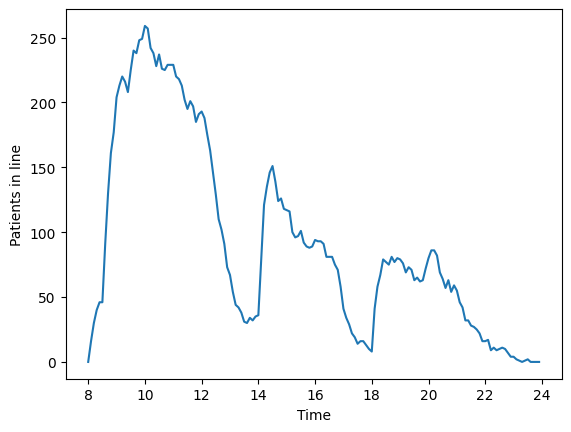

In [9]:
PATIENT_IN_ROOM = []
for i in range(80, 240):
     t = i / 10
     PATIENT_IN_ROOM.append(len(df.loc[df['Check-in Time'] <= t].loc[t <= df['Entry Time']]))
plt.xlabel('Time')
plt.ylabel('Patients in line')
plt.plot(np.array(range(80, 240))/10 ,PATIENT_IN_ROOM)

In [10]:
df['Entry Time'] = df['Entry Time'].round(decimals=1)
df['Check-in Time'] = df['Check-in Time'].round(decimals=1)
df['Completion Time'] = df['Completion Time'].round(decimals=1)
df = df.groupby('Entry Time').mean().reset_index()
df

,Entry Time,Check-in Time,Completion Time,Waiting Time
0,8.2,8.100000,8.300000,9.350000
1,8.3,8.100000,8.433333,12.783333
2,8.4,8.112500,8.500000,17.887500
3,8.5,8.071429,8.571429,25.704762
4,8.6,8.275000,8.725000,19.679167
...,...,...,...,...
145,22.8,22.400000,22.812500,23.593750
146,22.9,22.800000,23.000000,9.650000
147,23.0,21.800000,23.000000,73.283333
148,23.2,22.900000,23.250000,20.516667


In [11]:
pdf = pd.DataFrame({ 'Entry Time': np.array(range(80, 240)) / 10, 'Patient in line': PATIENT_IN_ROOM })
df = df.join(pdf.set_index('Entry Time'), on='Entry Time', how='inner')
df

,Entry Time,Check-in Time,Completion Time,Waiting Time,Patient in line
0,8.2,8.100000,8.300000,9.350000,30
1,8.3,8.100000,8.433333,12.783333,40
2,8.4,8.112500,8.500000,17.887500,46
3,8.5,8.071429,8.571429,25.704762,46
4,8.6,8.275000,8.725000,19.679167,91
...,...,...,...,...,...
145,22.8,22.400000,22.812500,23.593750,7
146,22.9,22.800000,23.000000,9.650000,4
147,23.0,21.800000,23.000000,73.283333,4
148,23.2,22.900000,23.250000,20.516667,1


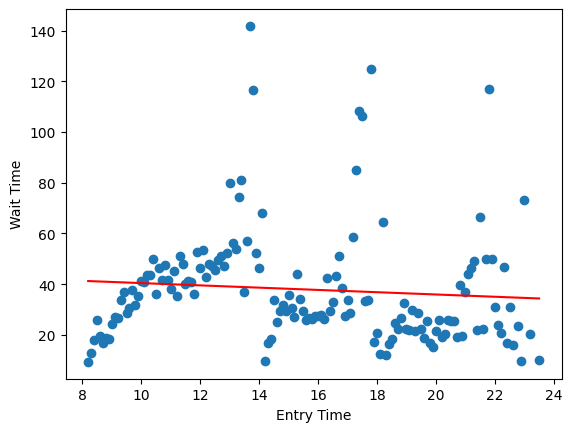

In [12]:
from sklearn.linear_model import LinearRegression

X = df['Entry Time'].to_numpy().reshape(-1, 1)
Y = df['Waiting Time'].to_numpy().reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.xlabel('Entry Time')
plt.ylabel('Wait Time')
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

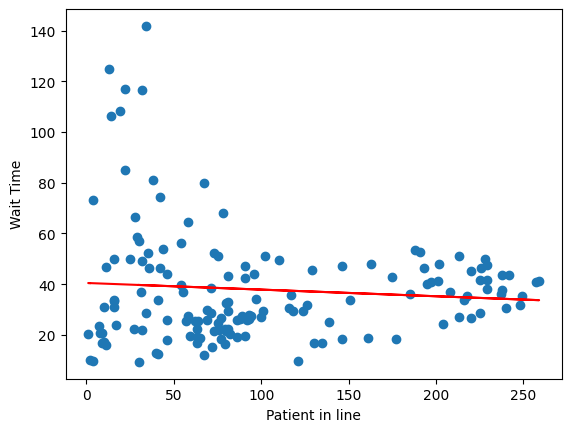

In [13]:
from sklearn.linear_model import LinearRegression

X = df['Patient in line'].to_numpy().reshape(-1, 1)
Y = df['Waiting Time'].to_numpy().reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.xlabel('Patient in line')
plt.ylabel('Wait Time')
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

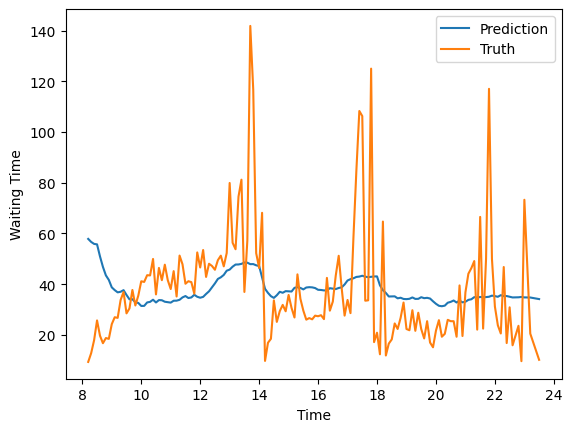

In [14]:
from sklearn.linear_model import LinearRegression

X = df[['Entry Time', 'Patient in line']].to_numpy()
Y = df['Waiting Time'].to_numpy().reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.xlabel('Time')
plt.ylabel('Waiting Time')
plt.plot(df['Entry Time'], Y_pred, label='Prediction')
plt.plot(df['Entry Time'], Y, label='Truth')
plt.legend()